#**LSTM Model Predictions**
  By Lucas (Deuce) Palmer

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 1st Stock: Microsoft Corp, MSFT


Download the data for the 3 time periods: 6-months, 1-year, 2-years from Yahoo Finance.

In [ ]:
df_6mo = yf.download('MSFT', start='2023-10-01', end='2024-03-31')
df_1yr = yf.download('MSFT', start='2023-03-31', end='2024-03-31')
df_2yr = yf.download('MSFT', start='2022-03-31', end='2024-03-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Collect only the daily close price from the Pandas Dataframe and scale the prices to be between 0 and 1

In [ ]:
data_6mo = df_6mo.filter(['Close'])
dataset_6mo = data_6mo.values
scaler_6mo = MinMaxScaler(feature_range=(0,1))
scaled_data_6mo = scaler_6mo.fit_transform(dataset_6mo)

data_1yr = df_1yr.filter(['Close'])
dataset_1yr = data_1yr.values
scaler_1yr = MinMaxScaler(feature_range=(0,1))
scaled_data_1yr = scaler_1yr.fit_transform(dataset_1yr)

data_2yr = df_2yr.filter(['Close'])
dataset_2yr = data_2yr.values
scaler_2yr = MinMaxScaler(feature_range=(0,1))
scaled_data_2yr = scaler_2yr.fit_transform(dataset_2yr)

Split the data for each time period into training data (80%) and test data (20%). Implement a lookback window of size 10.

In [ ]:
training_data_len_6mo = int(np.ceil( len(dataset_6mo) * .80 ))
train_data_6mo = scaled_data_6mo[0:int(training_data_len_6mo), :]
x_train_6mo = []
y_train_6mo = []
for i in range(10, len(train_data_6mo)):
    x_train_6mo.append(train_data_6mo[i-10:i, 0])
    y_train_6mo.append(train_data_6mo[i, 0])
x_train_6mo, y_train_6mo = np.array(x_train_6mo), np.array(y_train_6mo)
x_train_6mo = np.reshape(x_train_6mo, (x_train_6mo.shape[0], x_train_6mo.shape[1], 1))
test_data_6mo = scaled_data_6mo[training_data_len_6mo - 10: , :]
x_test_6mo = []
y_test_6mo = dataset_6mo[training_data_len_6mo:, :]
for i in range(10, len(test_data_6mo)):
    x_test_6mo.append(test_data_6mo[i-10:i, 0])
x_test_6mo = np.array(x_test_6mo)
x_test_6mo = np.reshape(x_test_6mo, (x_test_6mo.shape[0], x_test_6mo.shape[1], 1 ))


training_data_len_1yr = int(np.ceil( len(dataset_1yr) * .80 ))
train_data_1yr = scaled_data_1yr[0:int(training_data_len_1yr), :]
x_train_1yr = []
y_train_1yr = []
for i in range(10, len(train_data_1yr)):
    x_train_1yr.append(train_data_1yr[i-10:i, 0])
    y_train_1yr.append(train_data_1yr[i, 0])
x_train_1yr, y_train_1yr = np.array(x_train_1yr), np.array(y_train_1yr)
x_train_1yr = np.reshape(x_train_1yr, (x_train_1yr.shape[0], x_train_1yr.shape[1], 1))
test_data_1yr = scaled_data_1yr[training_data_len_1yr - 10: , :]
x_test_1yr = []
y_test_1yr = dataset_1yr[training_data_len_1yr:, :]
for i in range(10, len(test_data_1yr)):
    x_test_1yr.append(test_data_1yr[i-10:i, 0])
x_test_1yr = np.array(x_test_1yr)
x_test_1yr = np.reshape(x_test_1yr, (x_test_1yr.shape[0], x_test_1yr.shape[1], 1 ))


training_data_len_2yr = int(np.ceil( len(dataset_2yr) * .80 ))
train_data_2yr = scaled_data_2yr[0:int(training_data_len_2yr), :]
x_train_2yr = []
y_train_2yr = []
for i in range(10, len(train_data_2yr)):
    x_train_2yr.append(train_data_2yr[i-10:i, 0])
    y_train_2yr.append(train_data_2yr[i, 0])
x_train_2yr, y_train_2yr = np.array(x_train_2yr), np.array(y_train_2yr)
x_train_2yr = np.reshape(x_train_2yr, (x_train_2yr.shape[0], x_train_2yr.shape[1], 1))

test_data_2yr = scaled_data_2yr[training_data_len_2yr - 10: , :]
x_test_2yr = []
y_test_2yr = dataset_2yr[training_data_len_2yr:, :]
for i in range(10, len(test_data_2yr)):
    x_test_2yr.append(test_data_2yr[i-10:i, 0])
x_test_2yr = np.array(x_test_2yr)
x_test_2yr = np.reshape(x_test_2yr, (x_test_2yr.shape[0], x_test_2yr.shape[1], 1 ))

Compile and fit the model

In [ ]:
model_6mo = Sequential()
model_6mo.add(LSTM(40, input_shape= (x_train_6mo.shape[1], 1)))
model_6mo.add(Dense(1))
model_6mo.compile(optimizer='adam', loss='mean_squared_error')
plot_6mo = model_6mo.fit(x_train_6mo, y_train_6mo, batch_size=25, epochs=100, verbose=2)


model_1yr = Sequential()
model_1yr.add(LSTM(40, input_shape= (x_train_1yr.shape[1], 1)))
model_1yr.add(Dense(1))
model_1yr.compile(optimizer='adam', loss='mean_squared_error')
plot_1yr = model_1yr.fit(x_train_1yr, y_train_1yr, batch_size=25, epochs=100, verbose=2)


model_2yr = Sequential()
model_2yr.add(LSTM(40, input_shape= (x_train_2yr.shape[1], 1)))
model_2yr.add(Dense(1))
model_2yr.compile(optimizer='adam', loss='mean_squared_error')
plot_2yr = model_2yr.fit(x_train_2yr, y_train_2yr, batch_size=25, epochs=100, verbose=2)

# During experimentaition of additional layers
# model_6mo.add(LSTM(40, input_shape= (x_train_6mo.shape[1], 1), return_sequences=True))
# model_6mo.add(LSTM(50))
# model_1yr.add(LSTM(40, input_shape= (x_train_1yr.shape[1], 1), return_sequences=True))
# model_1yr.add(LSTM(40))
# model_2yr.add(LSTM(40, input_shape= (x_train_2yr.shape[1], 1), return_sequences=True))
# model_2yr.add(LSTM(40))

Epoch 1/100
4/4 - 2s - loss: 0.1590 - 2s/epoch - 545ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0840 - 31ms/epoch - 8ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0299 - 24ms/epoch - 6ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0054 - 27ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0113 - 26ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0146 - 27ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0068 - 26ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0038 - 25ms/epoch - 6ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0047 - 27ms/epoch - 7ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0054 - 25ms/epoch - 6ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0046 - 27ms/epoch - 7ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0036 - 32ms/epoch - 8ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0035 - 25ms/epoch - 6ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0037 - 29ms/epoch - 7ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0036 - 28ms/epoch - 7ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0034 - 26ms/epoch - 7ms/step
Epoch 17/100
4/4 - 0s - loss: 0.0

Show evidence of convergence for each training period

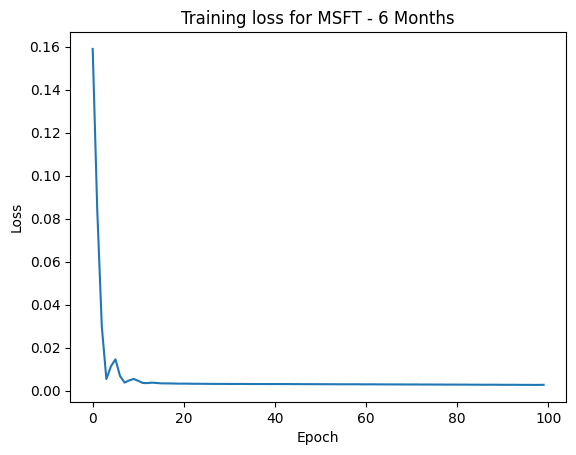

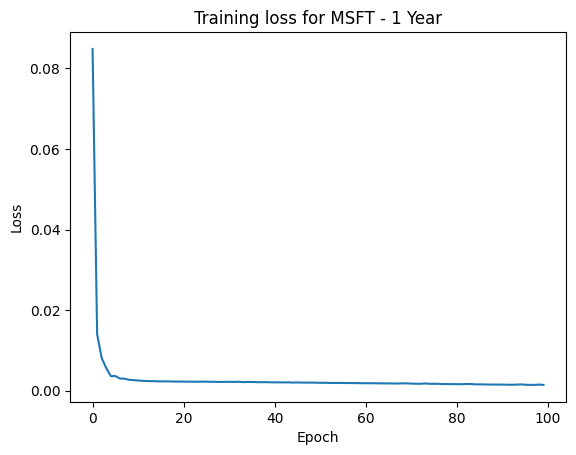

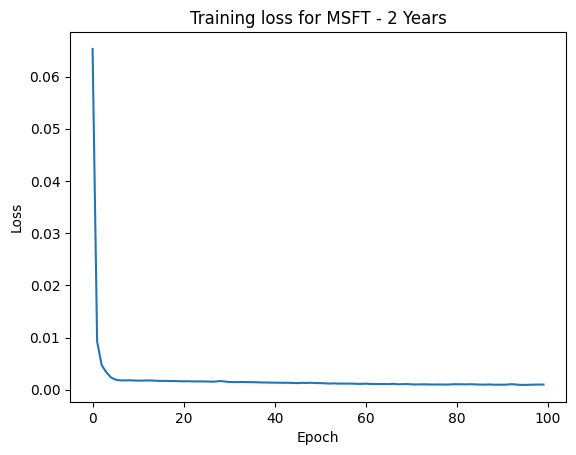

In [ ]:
plt.plot(plot_6mo.history['loss'])
plt.title("Training loss for MSFT - 6 Months")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(plot_1yr.history['loss'])
plt.title("Training loss for MSFT - 1 Year")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(plot_2yr.history['loss'])
plt.title("Training loss for MSFT - 2 Years")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Calculate the Root Mean-Square Error (RMSE) on the unseen data points

In [ ]:
test_predictions_6mo = model_6mo.predict(x_test_6mo)
test_predictions_6mo = scaler_6mo.inverse_transform(test_predictions_6mo)
test_rmse_6mo = np.sqrt(np.mean(((test_predictions_6mo - y_test_6mo) ** 2)))
print("RMSE (6 Months): ", test_rmse_6mo)

test_predictions_1yr = model_1yr.predict(x_test_1yr)
test_predictions_1yr = scaler_1yr.inverse_transform(test_predictions_1yr)
test_rmse_1yr = np.sqrt(np.mean(((test_predictions_1yr - y_test_1yr) ** 2)))
print("RMSE (1 Year): ", test_rmse_1yr)

test_predictions_2yr = model_2yr.predict(x_test_2yr)
test_predictions_2yr = scaler_2yr.inverse_transform(test_predictions_2yr)
test_rmse_2yr = np.sqrt(np.mean(((test_predictions_2yr - y_test_2yr) ** 2)))
print("RMSE (2 Years): ", test_rmse_2yr)

1/1 [==============================] - 0s 418ms/step
RMSE (6 Months):  5.740146486730878
2/2 [==============================] - 0s 7ms/step
RMSE (1 Year):  5.776704277479626
4/4 [==============================] - 1s 5ms/step
RMSE (2 Years):  4.923830744546128


Plot the training closing prices (blue), test closing prices (orange), and the model's predictions (green)

<ipython-input-61-0be3fe65be60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstprediction_6mo['Predictions'] = test_predictions_6mo


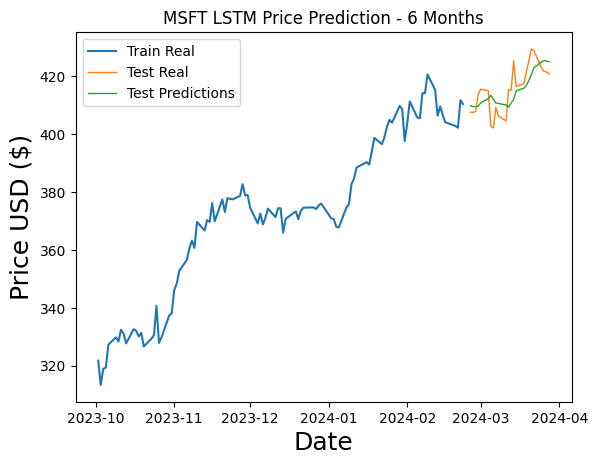

<ipython-input-61-0be3fe65be60>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstprediction_1yr['Predictions'] = test_predictions_1yr


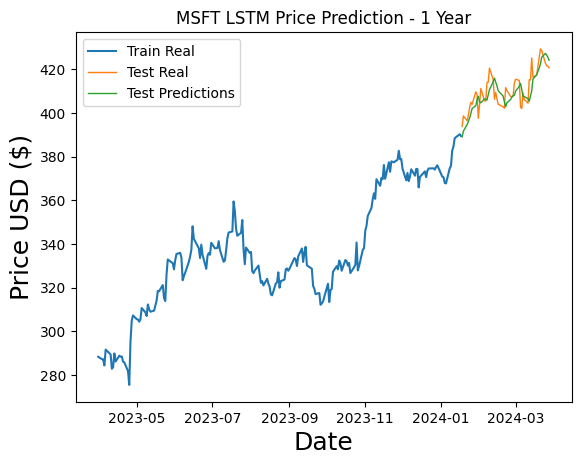

<ipython-input-61-0be3fe65be60>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstprediction_2yr['Predictions'] = test_predictions_2yr


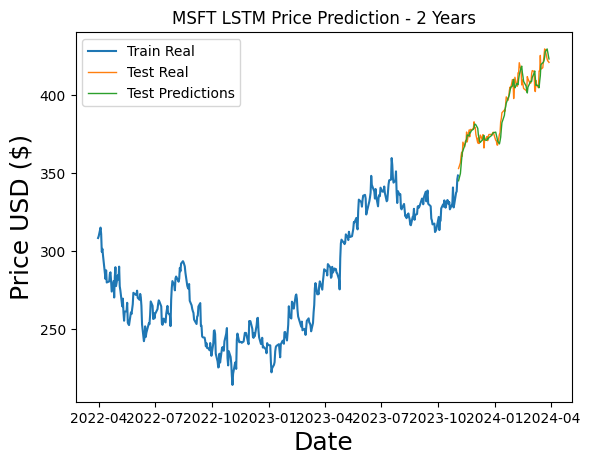

In [ ]:
trainingplot_6mo = data_6mo[:training_data_len_6mo]
tstprediction_6mo = data_6mo[training_data_len_6mo:]
tstprediction_6mo['Predictions'] = test_predictions_6mo
plt.title('MSFT LSTM Price Prediction - 6 Months')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(trainingplot_6mo['Close'])
plt.plot(tstprediction_6mo[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train Real', 'Test Real', 'Test Predictions'], loc='upper left')
plt.show()

trainingplot_1yr = data_1yr[:training_data_len_1yr]
tstprediction_1yr = data_1yr[training_data_len_1yr:]
tstprediction_1yr['Predictions'] = test_predictions_1yr
plt.title('MSFT LSTM Price Prediction - 1 Year')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(trainingplot_1yr['Close'])
plt.plot(tstprediction_1yr[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train Real', 'Test Real', 'Test Predictions'], loc='upper left')
plt.show()

trainingplot_2yr = data_2yr[:training_data_len_2yr]
tstprediction_2yr = data_2yr[training_data_len_2yr:]
tstprediction_2yr['Predictions'] = test_predictions_2yr
plt.title('MSFT LSTM Price Prediction - 2 Years')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(trainingplot_2yr['Close'])
plt.plot(tstprediction_2yr[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train Real', 'Test Real', 'Test Predictions'], loc='upper left')
plt.show()

# 2nd Stock: China Evergrande Group, EGRNQ


Download the data for the 3 time periods: 6-months, 1-year, 2-years from Yahoo Finance.

In [ ]:
df_6mo = yf.download('EGRNQ', start='2023-10-01', end='2024-03-31')
df_1yr = yf.download('EGRNQ', start='2023-03-31', end='2024-03-31')
df_2yr = yf.download('EGRNQ', start='2022-03-31', end='2024-03-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Collect only the daily close price from the Pandas Dataframe and scale the prices to be between 0 and 1

In [ ]:
data_6mo = df_6mo.filter(['Close'])
dataset_6mo = data_6mo.values
scaler_6mo = MinMaxScaler(feature_range=(0,1))
scaled_data_6mo = scaler_6mo.fit_transform(dataset_6mo)

data_1yr = df_1yr.filter(['Close'])
dataset_1yr = data_1yr.values
scaler_1yr = MinMaxScaler(feature_range=(0,1))
scaled_data_1yr = scaler_1yr.fit_transform(dataset_1yr)

data_2yr = df_2yr.filter(['Close'])
dataset_2yr = data_2yr.values
scaler_2yr = MinMaxScaler(feature_range=(0,1))
scaled_data_2yr = scaler_2yr.fit_transform(dataset_2yr)

Split the data for each time period into training data (80%) and test data (20%). Implement a lookback window of size 10.

In [ ]:
training_data_len_6mo = int(np.ceil( len(dataset_6mo) * .80 ))
train_data_6mo = scaled_data_6mo[0:int(training_data_len_6mo), :]
x_train_6mo = []
y_train_6mo = []
for i in range(10, len(train_data_6mo)):
    x_train_6mo.append(train_data_6mo[i-10:i, 0])
    y_train_6mo.append(train_data_6mo[i, 0])
x_train_6mo, y_train_6mo = np.array(x_train_6mo), np.array(y_train_6mo)
x_train_6mo = np.reshape(x_train_6mo, (x_train_6mo.shape[0], x_train_6mo.shape[1], 1))
test_data_6mo = scaled_data_6mo[training_data_len_6mo - 10: , :]
x_test_6mo = []
y_test_6mo = dataset_6mo[training_data_len_6mo:, :]
for i in range(10, len(test_data_6mo)):
    x_test_6mo.append(test_data_6mo[i-10:i, 0])
x_test_6mo = np.array(x_test_6mo)
x_test_6mo = np.reshape(x_test_6mo, (x_test_6mo.shape[0], x_test_6mo.shape[1], 1 ))


training_data_len_1yr = int(np.ceil( len(dataset_1yr) * .80 ))
train_data_1yr = scaled_data_1yr[0:int(training_data_len_1yr), :]
x_train_1yr = []
y_train_1yr = []
for i in range(10, len(train_data_1yr)):
    x_train_1yr.append(train_data_1yr[i-10:i, 0])
    y_train_1yr.append(train_data_1yr[i, 0])
x_train_1yr, y_train_1yr = np.array(x_train_1yr), np.array(y_train_1yr)
x_train_1yr = np.reshape(x_train_1yr, (x_train_1yr.shape[0], x_train_1yr.shape[1], 1))
test_data_1yr = scaled_data_1yr[training_data_len_1yr - 10: , :]
x_test_1yr = []
y_test_1yr = dataset_1yr[training_data_len_1yr:, :]
for i in range(10, len(test_data_1yr)):
    x_test_1yr.append(test_data_1yr[i-10:i, 0])
x_test_1yr = np.array(x_test_1yr)
x_test_1yr = np.reshape(x_test_1yr, (x_test_1yr.shape[0], x_test_1yr.shape[1], 1 ))


training_data_len_2yr = int(np.ceil( len(dataset_2yr) * .80 ))
train_data_2yr = scaled_data_2yr[0:int(training_data_len_2yr), :]
x_train_2yr = []
y_train_2yr = []
for i in range(10, len(train_data_2yr)):
    x_train_2yr.append(train_data_2yr[i-10:i, 0])
    y_train_2yr.append(train_data_2yr[i, 0])
x_train_2yr, y_train_2yr = np.array(x_train_2yr), np.array(y_train_2yr)
x_train_2yr = np.reshape(x_train_2yr, (x_train_2yr.shape[0], x_train_2yr.shape[1], 1))

test_data_2yr = scaled_data_2yr[training_data_len_2yr - 10: , :]
x_test_2yr = []
y_test_2yr = dataset_2yr[training_data_len_2yr:, :]
for i in range(10, len(test_data_2yr)):
    x_test_2yr.append(test_data_2yr[i-10:i, 0])
x_test_2yr = np.array(x_test_2yr)
x_test_2yr = np.reshape(x_test_2yr, (x_test_2yr.shape[0], x_test_2yr.shape[1], 1 ))

Compile and fit the model

In [ ]:
model_6mo = Sequential()
model_6mo.add(LSTM(40, input_shape= (x_train_6mo.shape[1], 1)))
model_6mo.add(Dense(1))
model_6mo.compile(optimizer='adam', loss='mean_squared_error')
plot_6mo = model_6mo.fit(x_train_6mo, y_train_6mo, batch_size=25, epochs=100, verbose=2)


model_1yr = Sequential()
model_1yr.add(LSTM(40, input_shape= (x_train_1yr.shape[1], 1)))
model_1yr.add(Dense(1))
model_1yr.compile(optimizer='adam', loss='mean_squared_error')
plot_1yr = model_1yr.fit(x_train_1yr, y_train_1yr, batch_size=25, epochs=100, verbose=2)


model_2yr = Sequential()
model_2yr.add(LSTM(40, input_shape= (x_train_2yr.shape[1], 1)))
model_2yr.add(Dense(1))
model_2yr.compile(optimizer='adam', loss='mean_squared_error')
plot_2yr = model_2yr.fit(x_train_2yr, y_train_2yr, batch_size=25, epochs=100, verbose=2)

# During experimentaition of additional layers
# model_6mo.add(LSTM(40, input_shape= (x_train_6mo.shape[1], 1), return_sequences=True))
# model_6mo.add(LSTM(50))
# model_1yr.add(LSTM(40, input_shape= (x_train_1yr.shape[1], 1), return_sequences=True))
# model_1yr.add(LSTM(40))
# model_2yr.add(LSTM(40, input_shape= (x_train_2yr.shape[1], 1), return_sequences=True))
# model_2yr.add(LSTM(40))

Epoch 1/100
4/4 - 3s - loss: 0.1910 - 3s/epoch - 693ms/step
Epoch 2/100
4/4 - 0s - loss: 0.1363 - 43ms/epoch - 11ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0909 - 45ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0582 - 38ms/epoch - 10ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0429 - 39ms/epoch - 10ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0439 - 26ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0464 - 28ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0435 - 30ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0399 - 35ms/epoch - 9ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0391 - 29ms/epoch - 7ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0394 - 28ms/epoch - 7ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0395 - 39ms/epoch - 10ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0393 - 30ms/epoch - 8ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0387 - 31ms/epoch - 8ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0390 - 29ms/epoch - 7ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0383 - 33ms/epoch - 8ms/step
Epoch 17/100
4/4 - 0s - loss

Show evidence of convergence for each training period

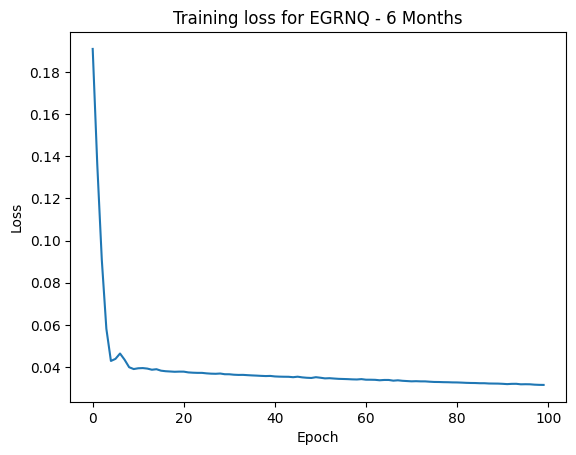

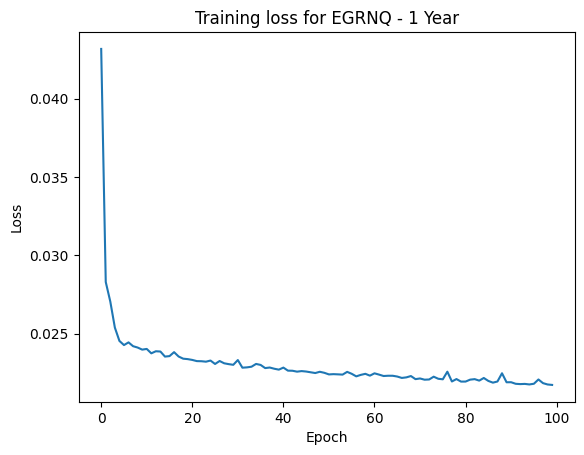

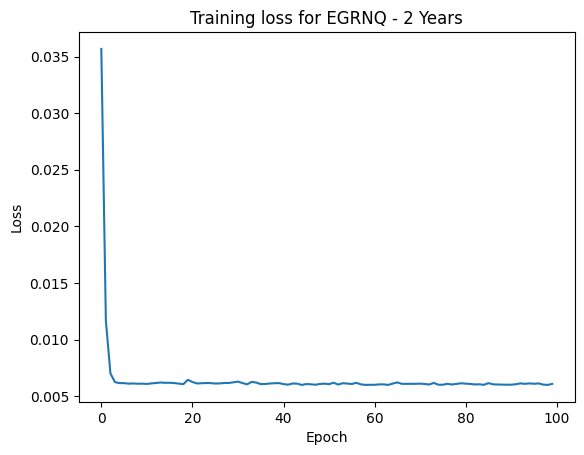

In [ ]:
plt.plot(plot_6mo.history['loss'])
plt.title("Training loss for EGRNQ - 6 Months")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(plot_1yr.history['loss'])
plt.title("Training loss for EGRNQ - 1 Year")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(plot_2yr.history['loss'])
plt.title("Training loss for EGRNQ - 2 Years")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Calculate the Root Mean-Square Error (RMSE) on the unseen data points

In [ ]:
test_predictions_6mo = model_6mo.predict(x_test_6mo)
test_predictions_6mo = scaler_6mo.inverse_transform(test_predictions_6mo)
test_rmse_6mo = np.sqrt(np.mean(((test_predictions_6mo - y_test_6mo) ** 2)))
print("RMSE (6 Months): ", test_rmse_6mo)

test_predictions_1yr = model_1yr.predict(x_test_1yr)
test_predictions_1yr = scaler_1yr.inverse_transform(test_predictions_1yr)
test_rmse_1yr = np.sqrt(np.mean(((test_predictions_1yr - y_test_1yr) ** 2)))
print("RMSE (1 Year): ", test_rmse_1yr)

test_predictions_2yr = model_2yr.predict(x_test_2yr)
test_predictions_2yr = scaler_2yr.inverse_transform(test_predictions_2yr)
test_rmse_2yr = np.sqrt(np.mean(((test_predictions_2yr - y_test_2yr) ** 2)))
print("RMSE (2 Years): ", test_rmse_2yr)

1/1 [==============================] - 0s 491ms/step
RMSE (6 Months):  0.006123126078466233
2/2 [==============================] - 0s 6ms/step
RMSE (1 Year):  0.006170845919696609
4/4 [==============================] - 0s 4ms/step
RMSE (2 Years):  0.015609280311836136


Plot the training closing prices (blue), test closing prices (orange), and the model's predictions (green)

<ipython-input-68-6136e3b74f2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstprediction_6mo['Predictions'] = test_predictions_6mo


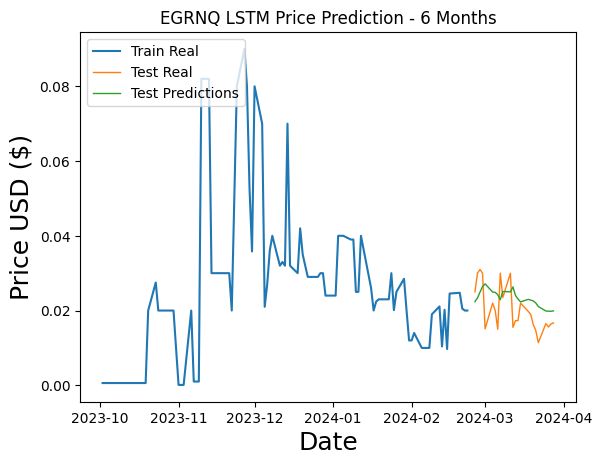

<ipython-input-68-6136e3b74f2f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstprediction_1yr['Predictions'] = test_predictions_1yr


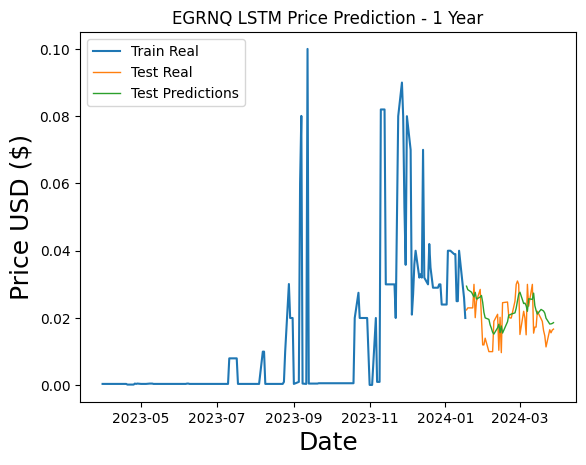

<ipython-input-68-6136e3b74f2f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstprediction_2yr['Predictions'] = test_predictions_2yr


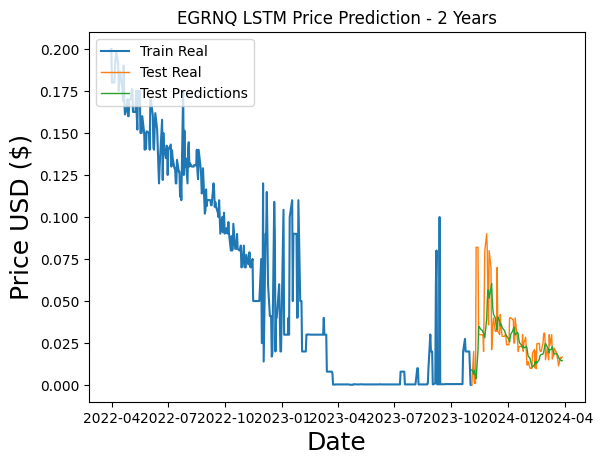

In [ ]:
trainingplot_6mo = data_6mo[:training_data_len_6mo]
tstprediction_6mo = data_6mo[training_data_len_6mo:]
tstprediction_6mo['Predictions'] = test_predictions_6mo
plt.title('EGRNQ LSTM Price Prediction - 6 Months')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(trainingplot_6mo['Close'])
plt.plot(tstprediction_6mo[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train Real', 'Test Real', 'Test Predictions'], loc='upper left')
plt.show()

trainingplot_1yr = data_1yr[:training_data_len_1yr]
tstprediction_1yr = data_1yr[training_data_len_1yr:]
tstprediction_1yr['Predictions'] = test_predictions_1yr
plt.title('EGRNQ LSTM Price Prediction - 1 Year')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(trainingplot_1yr['Close'])
plt.plot(tstprediction_1yr[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train Real', 'Test Real', 'Test Predictions'], loc='upper left')
plt.show()

trainingplot_2yr = data_2yr[:training_data_len_2yr]
tstprediction_2yr = data_2yr[training_data_len_2yr:]
tstprediction_2yr['Predictions'] = test_predictions_2yr
plt.title('EGRNQ LSTM Price Prediction - 2 Years')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(trainingplot_2yr['Close'])
plt.plot(tstprediction_2yr[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train Real', 'Test Real', 'Test Predictions'], loc='upper left')
plt.show()